NATAN CABRAL DE AQUINO RA : 2202753 , 
GABRIEL FERREIRA DE SOUZA RA : 2203006, 
RENAN FERREIRA DE SOUZA RA :2202824 

In [1]:
pip install pandas
import pandas as pd
import missingno as msno
import plotly.express as px

# Importando as bases e removendo caracteres especiais.

In [2]:
#Importando bases
lista = ['../bases-originais/roubo_celular_01_2022.csv', '../bases-originais/roubo_celular_02_2022.csv','../bases-originais/roubo_celular_03_2022.csv']

In [3]:
# Juntando as 3 bases
dados = pd.DataFrame(pd.read_csv(lista[0],delimiter = ';', encoding='UTF-8'))
  
for i in range(1,len(lista)): 
    data = pd.read_csv(lista[i], delimiter = ';', encoding='latin1',on_bad_lines='skip') 
    df = pd.DataFrame(data) 
    dados = pd.concat([dados,df],axis=0)
dados

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,ï»¿ANO_BO
0,2022.0,1,jan/22,01/01/2022 01:31,01/01/2022 02:19,01/01/2022,00:03,DE MADRUGADA,01/01/2022,01/01/2022 01:31,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,OUTROS,NaN
1,2022.0,1,jan/22,01/01/2022 01:31,01/01/2022 02:19,01/01/2022,00:03,DE MADRUGADA,01/01/2022,01/01/2022 01:31,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,OUTROS,NaN
2,2022.0,9,set/22,01/01/2022 10:28,01/01/2022 11:45,31/12/2021,NaN,A TARDE,01/01/2022,01/01/2022 10:28,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple,NaN
3,2022.0,9,set/22,01/01/2022 10:28,01/01/2022 11:45,31/12/2021,NaN,A TARDE,01/01/2022,01/01/2022 10:28,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola,NaN
4,2022.0,2,fev/22,01/01/2022 14:09,01/01/2022 14:55,01/01/2022,02:00,DE MADRUGADA,01/01/2022,01/01/2022 14:09,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,NaN,717429,717429/2022,31/03/2022 16:02,31/03/2022 16:03,30/03/2022,21:10,A NOITE,31/03/2022,31/03/2022 16:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,2022.0
435,NaN,716670,716670/2022,31/03/2022 15:08,31/03/2022 16:17,20/03/2022,NaN,A TARDE,30/03/2022,31/03/2022 15:08,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,MOTOROLA,2022.0
436,NaN,717977,717977/2022,31/03/2022 16:40,31/03/2022 16:40,05/03/2022,18:40,A NOITE,31/03/2022,31/03/2022 16:40,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,2022.0
437,NaN,550,550/2022,31/03/2022 20:52,31/03/2022 23:50,31/03/2022,12:45,A TARDE,31/03/2022,31/03/2022 20:52,...,SP,S.PAULO,Branco,RENAULT/MASTER CH CABINE,2021.0,2022.0,CAMINHONETE,1.0,Motorola,2022.0


In [4]:
#Resentando o index
df.reset_index(drop=True).index.value_counts()

0      1
289    1
300    1
299    1
298    1
      ..
143    1
142    1
141    1
140    1
438    1
Name: count, Length: 439, dtype: int64

In [5]:
# mudando o nome do dataframe
df = dados.copy()
df

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,ï»¿ANO_BO
0,2022.0,1,jan/22,01/01/2022 01:31,01/01/2022 02:19,01/01/2022,00:03,DE MADRUGADA,01/01/2022,01/01/2022 01:31,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,OUTROS,NaN
1,2022.0,1,jan/22,01/01/2022 01:31,01/01/2022 02:19,01/01/2022,00:03,DE MADRUGADA,01/01/2022,01/01/2022 01:31,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,OUTROS,NaN
2,2022.0,9,set/22,01/01/2022 10:28,01/01/2022 11:45,31/12/2021,NaN,A TARDE,01/01/2022,01/01/2022 10:28,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple,NaN
3,2022.0,9,set/22,01/01/2022 10:28,01/01/2022 11:45,31/12/2021,NaN,A TARDE,01/01/2022,01/01/2022 10:28,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola,NaN
4,2022.0,2,fev/22,01/01/2022 14:09,01/01/2022 14:55,01/01/2022,02:00,DE MADRUGADA,01/01/2022,01/01/2022 14:09,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,NaN,717429,717429/2022,31/03/2022 16:02,31/03/2022 16:03,30/03/2022,21:10,A NOITE,31/03/2022,31/03/2022 16:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,2022.0
435,NaN,716670,716670/2022,31/03/2022 15:08,31/03/2022 16:17,20/03/2022,NaN,A TARDE,30/03/2022,31/03/2022 15:08,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,MOTOROLA,2022.0
436,NaN,717977,717977/2022,31/03/2022 16:40,31/03/2022 16:40,05/03/2022,18:40,A NOITE,31/03/2022,31/03/2022 16:40,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,2022.0
437,NaN,550,550/2022,31/03/2022 20:52,31/03/2022 23:50,31/03/2022,12:45,A TARDE,31/03/2022,31/03/2022 20:52,...,SP,S.PAULO,Branco,RENAULT/MASTER CH CABINE,2021.0,2022.0,CAMINHONETE,1.0,Motorola,2022.0


In [6]:
#Substituindo os caracteres especiais
df.replace({'á':'a','ã':'a', 'â':'a', 'í':'i',
                'ÅŸ':'s',
                'Ä°':'I',
                'Ä±':'i',
                'Ã¶':'o',
                'Ã§':'c',
                'ÄŸ':'g',
                'Ã¼':'u',
                'Ã©':'e',
                'Ã¡':'a',
                'Ã³':'o',
                'Ã±':'nh',
                '&':'',
                'Ã…Ë†':'n',
                'Ã§':'c',
                ' ':'',
                'Ã­':'i',
                'Ã£':'a',
                'Ãº':'u',
                'Ã':'a',
                'Ãª':'e',
                'Ã‘':'N',
                'aÂ¢':'a',
                'aÂª':'e',
                'aÂ':'a',
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "aª":"e",
                "á":"a",
                "é":"e",
                "í":"i",
                "ó":"o",
                "ú":"u",
                "ã":"a",
                "õ":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",
                "ê":"e",
                "â":"a",
                "ô":"o",':':'.',',':'.'          
              
              }, regex=True)
df.HORAOCORRENCIA = df.HORAOCORRENCIA.str.replace(':','.')
df.BO_INICIADO = df.BO_INICIADO.str.replace(':','.')
df.BO_EMITIDO = df.BO_EMITIDO.str.replace(':','.')
df.DATAELABORACAO = df.DATAELABORACAO.str.replace(':','.')
df.LONGITUDE = df.LONGITUDE.str.replace(',','.')
df.LATITUDE = df.LATITUDE.str.replace(',','.')


# Analisando e dropando duplicados.

In [7]:
# Analisando se existendo duplicados nas bases
df.duplicated().sum()


0

In [8]:
# Eliminando duplicados(se existirem)
df.drop_duplicates()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,ï»¿ANO_BO
0,2022.0,1,jan/22,01/01/2022 01.31,01/01/2022 02.19,01/01/2022,00.03,DE MADRUGADA,01/01/2022,01/01/2022 01.31,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,OUTROS,NaN
1,2022.0,1,jan/22,01/01/2022 01.31,01/01/2022 02.19,01/01/2022,00.03,DE MADRUGADA,01/01/2022,01/01/2022 01.31,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,OUTROS,NaN
2,2022.0,9,set/22,01/01/2022 10.28,01/01/2022 11.45,31/12/2021,NaN,A TARDE,01/01/2022,01/01/2022 10.28,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple,NaN
3,2022.0,9,set/22,01/01/2022 10.28,01/01/2022 11.45,31/12/2021,NaN,A TARDE,01/01/2022,01/01/2022 10.28,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola,NaN
4,2022.0,2,fev/22,01/01/2022 14.09,01/01/2022 14.55,01/01/2022,02.00,DE MADRUGADA,01/01/2022,01/01/2022 14.09,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Motorola,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,NaN,717429,717429/2022,31/03/2022 16.02,31/03/2022 16.03,30/03/2022,21.10,A NOITE,31/03/2022,31/03/2022 16.02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,2022.0
435,NaN,716670,716670/2022,31/03/2022 15.08,31/03/2022 16.17,20/03/2022,NaN,A TARDE,30/03/2022,31/03/2022 15.08,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,MOTOROLA,2022.0
436,NaN,717977,717977/2022,31/03/2022 16.40,31/03/2022 16.40,05/03/2022,18.40,A NOITE,31/03/2022,31/03/2022 16.40,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,2022.0
437,NaN,550,550/2022,31/03/2022 20.52,31/03/2022 23.50,31/03/2022,12.45,A TARDE,31/03/2022,31/03/2022 20.52,...,SP,S.PAULO,Branco,RENAULT/MASTER CH CABINE,2021.0,2022.0,CAMINHONETE,1.0,Motorola,2022.0


# Tratando dados missing e outliers

<Axes: >

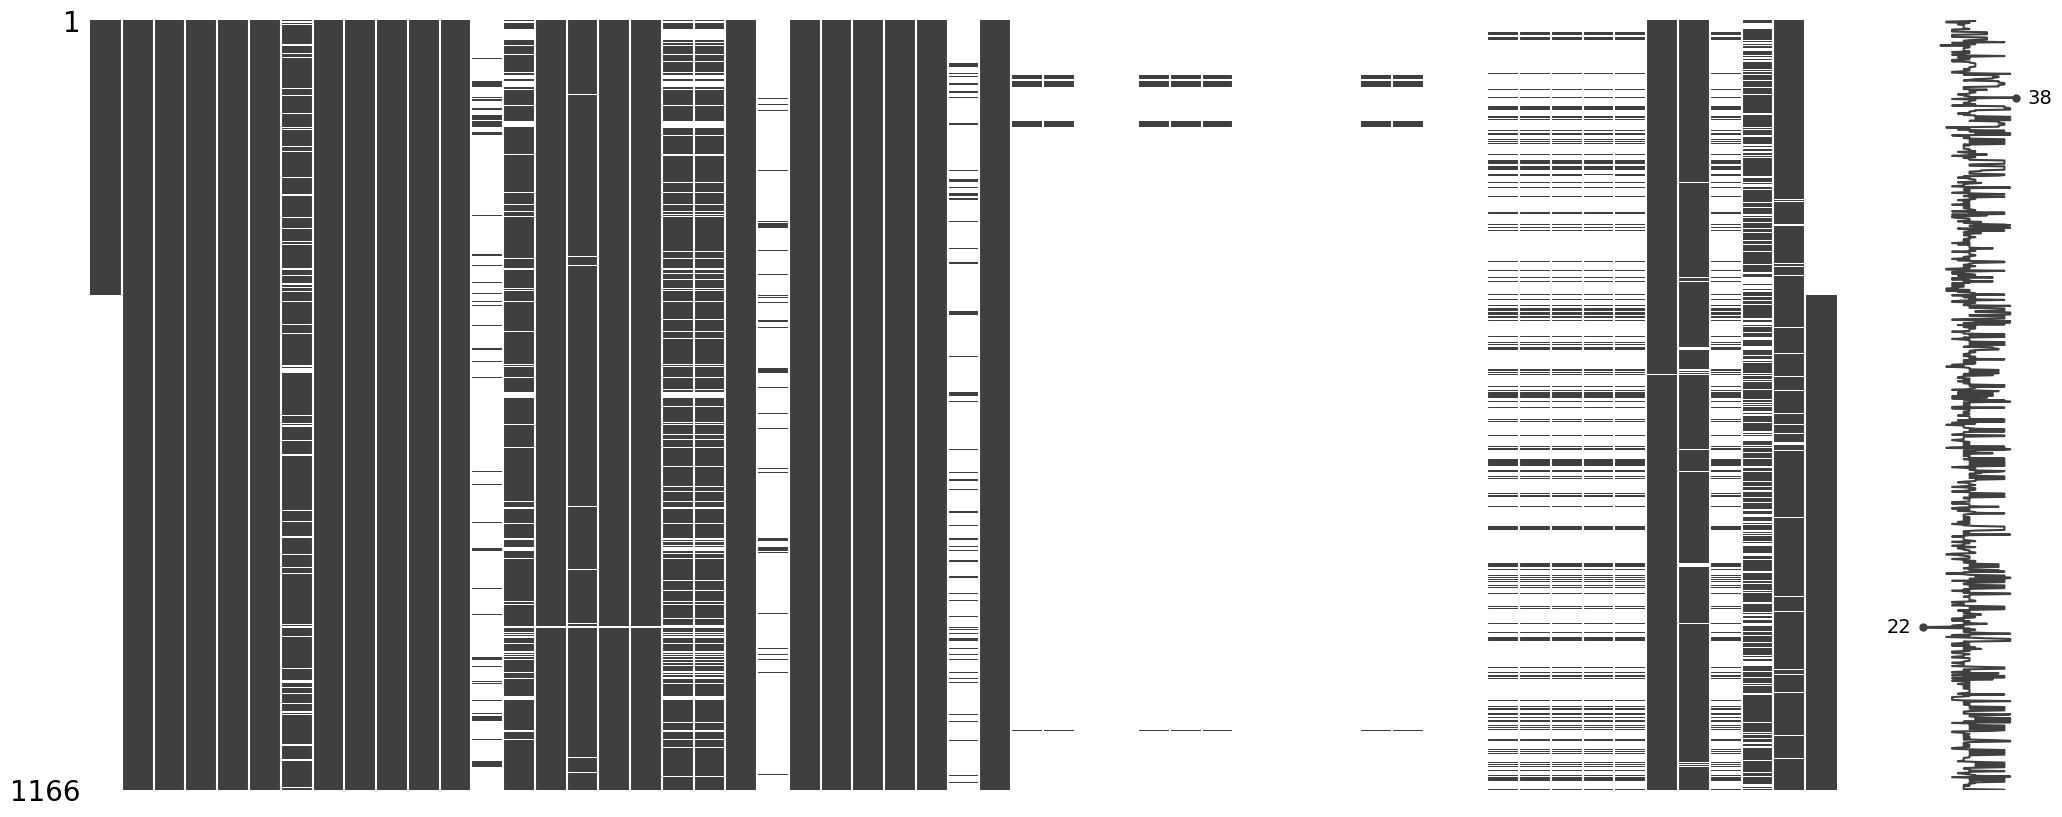

In [9]:
# Visualizando a base em formato de gráfico
msno.matrix(df)

In [10]:
#Dropando colunas sem dados ou com poucos dados
df = df.drop(columns = ['PARENTESCO','RELACIONAMENTO','CORCUTIS','GRAUINSTRUCAO','PROFISSAO','ESTADOCIVIL','NACIONALIDADE','NATURALIDADE',
                    'DATANASCIMENTO','EXAME','DESDOBRAMENTO','TIPOPESSOA','VITIMAFATAL','SEXO','IDADE','NATUREZAVINCULADA','TIPOVINCULO'])

In [11]:
#Todos os dados acima ou abaixo de 2022 é outlier
px.box(df.ANO_BO)

In [12]:
# Para tratar vou travar as outliers que estiverem abaixo ou acima de 2022 em 2022
df.loc[df.ANO_BO>2022, 'ANO_BO']= 2022
df.loc[df.ANO_BO<2022, 'ANO_BO']= 2022

In [13]:
#Sabemos que estamos trabalhando com uma base de dados de 2022, então vou preencher as linhas
# com dados ausentes da coluna ANO_BO com o ano de 2022                                                                                             
df.ANO_BO.fillna(2022)

0      2022.0
1      2022.0
2      2022.0
3      2022.0
4      2022.0
        ...  
434    2022.0
435    2022.0
436    2022.0
437    2022.0
438    2022.0
Name: ANO_BO, Length: 1166, dtype: float64

In [14]:
#Numero do BO é um dado que é atualizado a cadaz vez que surge um novo B.O
# Então não faz sentido travar as outliers nas extremidades
px.box(df.NUM_BO)

In [15]:
#Não existem outliers na coluna NUMERO_BOLETIM
px.box(df.NUMERO_BOLETIM)

In [16]:
#Vemos que não existem outliers na coluna BO_INICIADO
px.box(df.BO_INICIADO)

In [17]:
#Não existem outliers na coluna BO_EMITIDO
px.box(df.BO_EMITIDO)

In [18]:
#Não existem outliers na coluna DATAOCORRENCIA
px.box(df.DATAOCORRENCIA)

In [19]:
#Não existem outliers na coluna HORAOCORRENCIA
px.box(df.HORAOCORRENCIA)

In [20]:
# Trocando o tipo de dado da coluna HORA OCORRENCIA para 'float'
df.HORAOCORRENCIA = df.HORAOCORRENCIA.astype(float)

In [21]:
# Os roubos de celular ocorrem em média as 14:20
df.HORAOCORRENCIA.median()

14.2

In [22]:
#Inputando dados da média na coluna HORA OCORRENCIA
df.HORAOCORRENCIA.fillna(df.HORAOCORRENCIA.median(), inplace=True)

In [23]:
#Não existem outliers na coluna PERIDOOCORRENCIA
px.box(df.PERIDOOCORRENCIA)

In [24]:
#Não existem outiliers na coluna DATACOMUNICACAO
px.box(df.DATACOMUNICACAO)

In [25]:
#Não existem outliers na coluna DATAELABORACAO
px.box(df.DATAELABORACAO)

In [26]:
# A coluna BO_AUTORIA não necessita de tratamento, pois não existem outliers ou dados missing.
df.BO_AUTORIA.isnull().sum()

0

In [27]:
# A coluna BO_AUTORIA não necessita de tratamento, pois não existem outliers ou dados missing.
df.FLAGRANTE.isnull().sum()

0

In [28]:
#Não existem muitos dados na coluna NUMERO_BOLETIM_PRINCIPAL, mas são dados importantes
df.NUMERO_BOLETIM_PRINCIPAL.isnull().sum()
#Para não dropar a coluna,vou inputar "NÂO INFORMADO" nas linhas que estão vazias.
df.NUMERO_BOLETIM_PRINCIPAL.fillna('NÂO INFORMADO',inplace=True)


In [29]:
#Na coluna LOGRADOURO exitem dados missing
df.LOGRADOURO.isnull().sum()
# Vou tratar inputando "NÂO INFORMADO" nas linhas vazias.
df.LOGRADOURO.fillna('NÂO INFORMADO', inplace=True)

In [30]:
# Na coluna NUMERO tudo que está abaixo de 0 ou acima de 1131 é outlier
px.box(df.NUMERO)

In [31]:
#Vou tratar travando as outliers nas extremidades
df.loc[df.NUMERO>1131,'NUMERO']=1131
df.loc[df.NUMERO<0,'NUMERO']=0

In [32]:
#Existem dados missing nesta coluna 
df.NUMERO.isnull().sum()
#Vou tratar inputando 'NÂOINFORMADO'
df.NUMERO.fillna('NÂO INFORMADO', inplace=True)

In [33]:
#Não existem outliers nesta coluna
# Existem dados missing na coluna BAIRRO
df.BAIRRO.isnull().sum()
#Vou tratar inputando 'NÂOINFORMADO',pois não conseguimos descobrir o bairro em que ocorreu o roubo
df.BAIRRO.fillna('NÂO INFORMADO', inplace=True)

In [34]:
#Não existem outliers nesta coluna
#Existem dados missing na coluna CIDADE
df.CIDADE.isnull().sum()
#Vou tratar inputando 'NÂO INFORMADO', pois não conseguimos descobrir a cidade em que ocorreu o roubo
df.CIDADE.fillna('NÂO INFORMADO', inplace=True)

In [35]:
#Não existem outliers nesta coluna
#Existem dados missing na coluna CIDADE
df.UF.isnull().sum()
#Vou tratar inputando 'NÂO INFORMADO', pois não conseguimos descobrir o UF em que ocorreu o roubo
df.UF.fillna('NÂO INFORMADO', inplace=True)

In [36]:
# Trocando o tipo de dados das coluna LATITUDE e LONGITUDE para 'float'
df.LATITUDE = df.LATITUDE.astype(float)
df.LONGITUDE = df.LONGITUDE.astype(float)

In [37]:
# A media da coluna latitude é -23.17898976
df.LATITUDE.median()

-23.17898976

In [38]:
#Os dados acima de -22.66 ou abaixo de -23.62 são outliers da coluna LATITUDE
px.box(df.LATITUDE)

In [39]:
# Travando as outliers da coluna LATITUDE nas extremidades
df.loc[df.LATITUDE>=-22.62, 'LATITUDE']= -22.62
df.loc[df.LATITUDE<-23.69, 'LATITUDE']= -23.69

In [40]:
#A média da coluna LONGITUDE é -45.649605735
df.LONGITUDE.median()

-45.649605735

In [69]:
#Os dados acima de -44.84 ou abaixo de -46.12 são outliers da coluna LONGITUTE
px.box(df.LONGITUDE)

In [67]:
# Travando as outliers da coluna LONGITUDE nas extremidades
df.loc[df.LONGITUDE>=-44.84, 'LONGITUDE']= -44.84
df.loc[df.LONGITUDE<-46.12, 'LONGITUDE']= -46.12

In [68]:
px.box(df.LONGITUDE)

In [43]:
#Inputando dados nas colunas LATITUDE e LONGITUDE
df.LATITUDE.fillna(df.LATITUDE.median(), inplace=True)
df.LONGITUDE.fillna(df.LONGITUDE.median(), inplace =True)

In [44]:
#Não existem outliers e nem dados missing na coluna DESCRICAO LOCAL
#Para previnar dados missing vou inputar 'NÂO INFORMADO'
df.DESCRICAOLOCAL.fillna('NÂO INFORMADO',inplace=True )

In [45]:
#Não existem outliers e nem dados missing na coluna SOLUCAO
#Para previnar dados missing vou inputar 'NÂO INFORMADO'
df.SOLUCAO.fillna('NÂO INFORMADO',inplace=True )

In [46]:
#Não existem outliers e nem dados missing na coluna DELEGACIA NOME
#Para previnar dados missing vou inputar 'NÂO INFORMADO'
df.DELEGACIA_NOME.fillna('NÂO INFORMADO',inplace=True )

In [47]:
#Não existem outliers e nem dados missing na coluna DELEGACIA_CIRCUNSCRICAO
#Para previnar dados missing vou inputar 'NÂO INFORMADO'
df.DELEGACIA_CIRCUNSCRICAO.fillna('NÂO INFORMADO',inplace=True )

In [48]:
#Não existem outliers e nem dados missing na coluna ESPECIE
#Para previnar dados missing vou inputar 'NÂO INFORMADO'
df.ESPECIE.fillna('NÂO INFORMADO',inplace=True )

In [49]:
#Não existem outliers e nem dados missing na coluna RUBRICA
#Para previnar dados missing vou inputar 'NÂO INFORMADO'
df.RUBRICA.fillna('NÂO INFORMADO',inplace=True )

In [50]:
#Não existem outliers e nem dados missing na coluna STATUS
#Para previnar dados missing vou inputar 'NÂO INFORMADO'
df.STATUS.fillna('NÂO INFORMADO',inplace=True )

In [51]:
#Inputando dados na coluna PLACA_VEICULO
#Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.PLACA_VEICULO.fillna('NÂO INFORMADO', inplace=True)

In [52]:
# Inputando dados na coluna UF_VEICULO
# Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.UF_VEICULO.fillna('NÂO INFORMADO', inplace=True)

In [53]:
# Inputando dados na coluna CIDADE_VEICULO
# Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.CIDADE_VEICULO.fillna('NÂO INFORMADO', inplace=True)

In [54]:
#Inputando na coluna DESCR_COR_VEICULO 
df.DESCR_COR_VEICULO.fillna('NÂO INFORMADO', inplace=True)

In [55]:
# Inputando dados na coluna DESCR_MARCA_VEICULO
# Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.DESCR_MARCA_VEICULO.fillna('NÂO INFORMADO', inplace=True)

In [56]:
# Inputando dados na coluna ANO_FABRICACAO
# Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.ANO_FABRICACAO.fillna('NÃO INFORMADO', inplace=True)

In [57]:
# Inputando dados na coluna ANO_MODELO
# Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.ANO_MODELO.fillna('NÃO INFORMADO', inplace=True)

In [58]:
# Inputando dados na coluna DESCR_TIPO_VEICULO
# Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.DESCR_TIPO_VEICULO.fillna('NÃO INFORMADO', inplace=True)

In [59]:
# Inputando dados na coluna ANO_FABRICACAO
# Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.ANO_FABRICACAO.fillna('NÃO INFORMADO', inplace=True)

In [60]:
# Os individuos roubam em média 1 celular por incidente
df.QUANT_CELULAR.describe()

count    865.000000
mean       1.069364
std        0.387654
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: QUANT_CELULAR, dtype: float64

In [61]:
#Os dados acima de 1 são outlier
#Observando o gráfico não faz sentido travarmos nas extremidades, pois iriamos perder informasções importantes
px.box(df.QUANT_CELULAR)

In [62]:
#Substituindo os dados ausentes pela mediana
df.QUANT_CELULAR.fillna(df.QUANT_CELULAR.median(), inplace=True)

In [63]:
# Inputando dados na coluna MARCA_CELULAR
# Vou preencher os dados ausentes desta coluna como 'NÂO INFORMADO'
df.MARCA_CELULAR.fillna('NÃO INFORMADO', inplace=True)

In [64]:
#Salvando base
df.to_csv('bases-tratadas.csv',index=False)